    Dataset available on Kaggle
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import visualise as viz
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree

myseed = 3836

In [2]:
train_path = 'extracted/train.csv'
test_path = 'extracted/test.csv'
df_train = pd.read_csv(train_path)
print('training dataset loaded.')
df_test = pd.read_csv(test_path)
print('testing dataset loaded')
# print(f'{len(df_train.columns)} Columns available \n', df_train.columns)
print('Details of each feature could be found in data_description.txt')
train_size, test_size = df_train.shape[0], df_test.shape[0]
df_full = pd.concat((df_train, df_test), axis=0)  #.drop(['Id', 'SalePrice'], axis=1)
print('Combined the full dataset.',
      df_full.shape)  # We'll do data pre-processing to the whole dataset and split it later.

training dataset loaded.
testing dataset loaded
Details of each feature could be found in data_description.txt
Combined the full dataset. (2919, 81)


In [3]:
# Calculate the percentage of null values in each column
missing = df_full.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)
missing_percentage = missing / df_full.shape[0] * 100
print('Missing values\n', pd.concat([missing, missing_percentage], axis=1, keys=['count', 'percentage']))

Missing values
               count  percentage
PoolQC         2909   99.657417
MiscFeature    2814   96.402878
Alley          2721   93.216855
Fence          2348   80.438506
SalePrice      1459   49.982871
FireplaceQu    1420   48.646797
LotFrontage     486   16.649538
GarageCond      159    5.447071
GarageYrBlt     159    5.447071
GarageFinish    159    5.447071
GarageQual      159    5.447071
GarageType      157    5.378554
BsmtExposure     82    2.809181
BsmtCond         82    2.809181
BsmtQual         81    2.774923
BsmtFinType2     80    2.740665
BsmtFinType1     79    2.706406
MasVnrType       24    0.822199
MasVnrArea       23    0.787941
MSZoning          4    0.137033
Functional        2    0.068517
BsmtHalfBath      2    0.068517
BsmtFullBath      2    0.068517
Utilities         2    0.068517
KitchenQual       1    0.034258
TotalBsmtSF       1    0.034258
BsmtUnfSF         1    0.034258
GarageCars        1    0.034258
GarageArea        1    0.034258
BsmtFinSF2        1    0

In [4]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

After plotting the correlation matrix we notice that there are some columns have positive relationship with others. We might want to keep only one of them to reduce the dimensions.
[1stFlrSF,LotFrontage], [YearBuild,GarageYrBlt], [GrLivArea,TotRmsAbvGrd]


/Users/apple/Desktop/data mining/my clone/MATH3836-data_mining-1/visualise.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap='coolwarm', square=True)


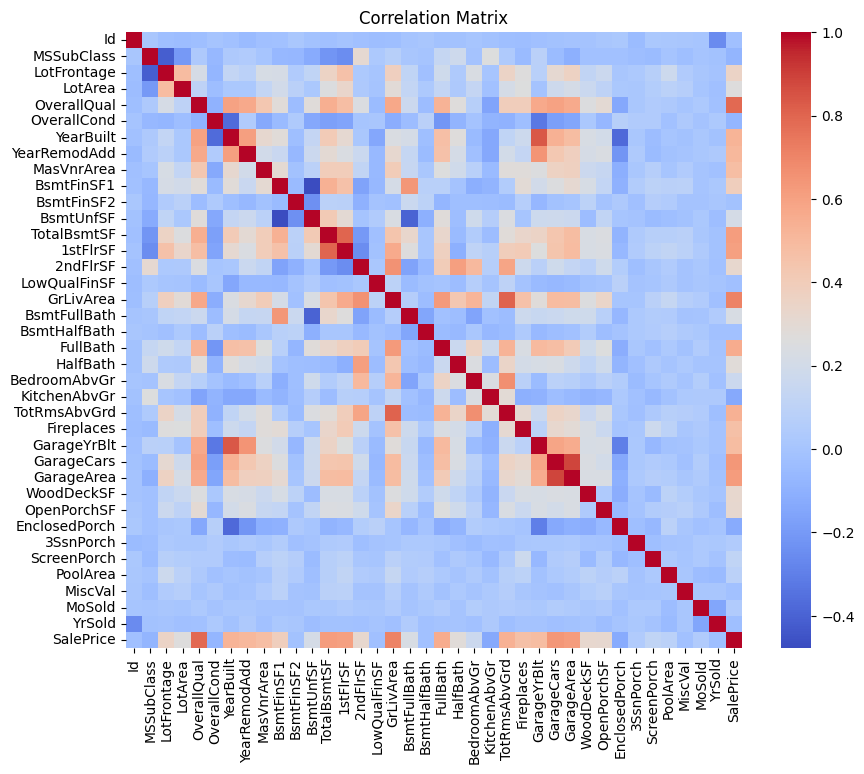

corr
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64


/var/folders/zw/h69rqth52kx48cx92_nj5www0000gn/T/ipykernel_36291/3077461730.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('corr\n', df_full.corr().SalePrice.abs().loc[lambda x: x > 0.3].sort_values(ascending=False))


In [5]:
viz.heatmap(df_full)
print('corr\n', df_full.corr().SalePrice.abs().loc[lambda x: x > 0.3].sort_values(ascending=False))

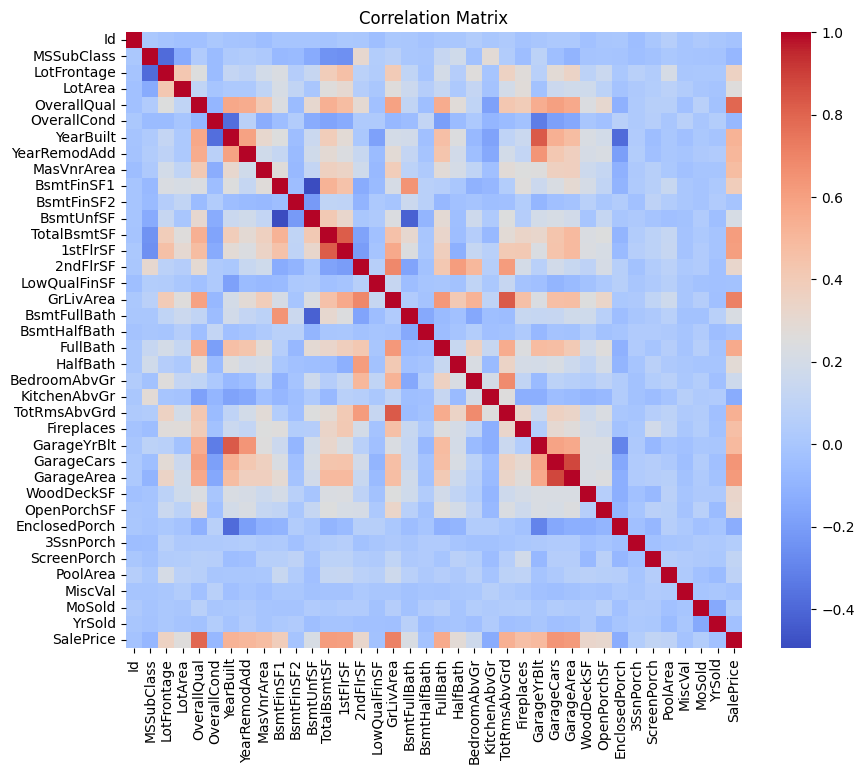

corr
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
Name: SalePrice, dtype: float64


/var/folders/zw/h69rqth52kx48cx92_nj5www0000gn/T/ipykernel_36291/2800777632.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('corr\n', df_train.corr().SalePrice.abs().loc[lambda x: x > 0.3].sort_values(ascending=False))


In [6]:
viz.heatmap(df_train)
print('corr\n', df_train.corr().SalePrice.abs().loc[lambda x: x > 0.3].sort_values(ascending=False))

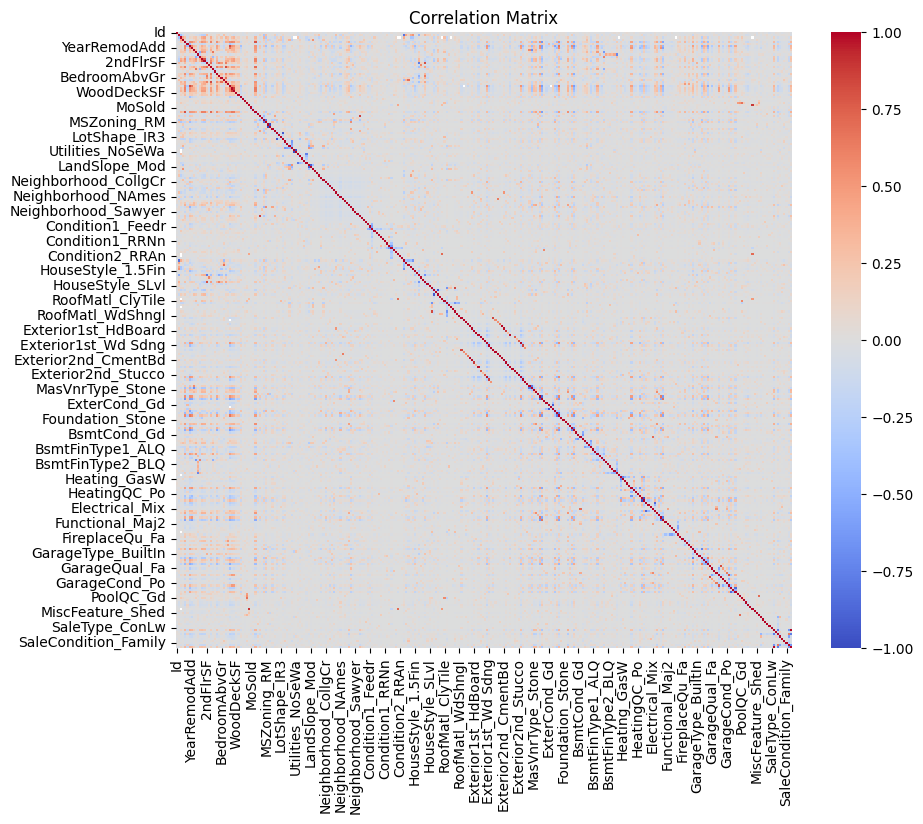

corr
 SalePrice                1.000000
OverallQual              0.790982
GrLivArea                0.708624
GarageCars               0.640409
GarageArea               0.623431
TotalBsmtSF              0.613581
1stFlrSF                 0.605852
ExterQual_TA             0.589044
FullBath                 0.560664
BsmtQual_Ex              0.553105
TotRmsAbvGrd             0.533723
YearBuilt                0.522897
KitchenQual_TA           0.519298
YearRemodAdd             0.507101
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
GarageYrBlt              0.486362
MasVnrArea               0.477493
Fireplaces               0.466929
ExterQual_Gd             0.452466
BsmtQual_TA              0.452394
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
GarageFinish_Unf         0.410608
Neighborhood_NridgHt     0.402149
BsmtFinSF1               0.386420
MasVnrType_None          0.374468
SaleType

In [7]:
# Try showing the corr() after one-hot, however it's hard to see the importance in a heatmap as the dimension after one-hot encoding is too large
df_train_onehot = pd.get_dummies(df_train)
viz.heatmap(df_train_onehot)
print('corr\n', df_train_onehot.corr().SalePrice.abs().loc[lambda x: x > 0.3].sort_values(ascending=False))

After considering the categorical data, we noticed that
ExterQual_TA, BsmtQual_Ex, KitchenQual_TA, KitchenQual_Ex
have relatively positive relationship with the saleprice

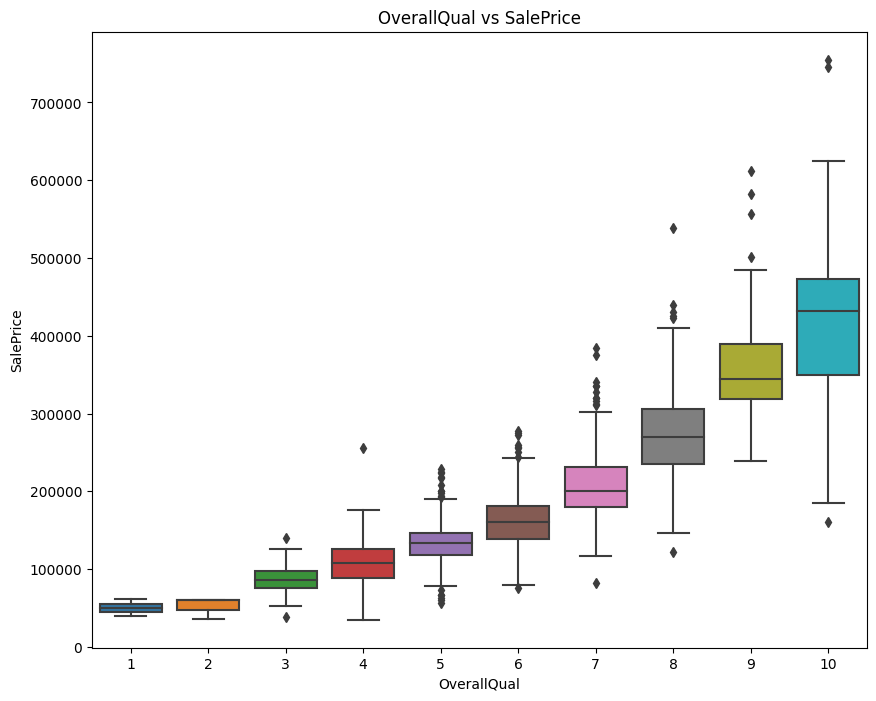

In [8]:
# The mean saleprice increase with the overall quality of property
viz.box_plot(df_train_onehot, 'OverallQual', 'SalePrice')

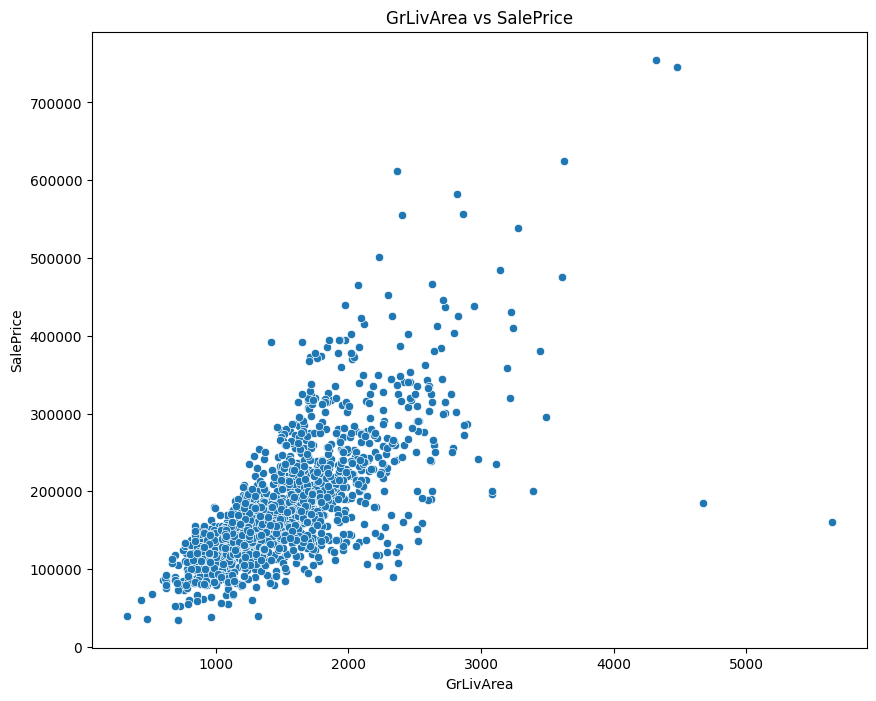

In [9]:
# A linear relationship could be observed, a few outliers are observed
viz.scatter_plot(df_train_onehot, 'GrLivArea', 'SalePrice')
outliers = []
outliers.append(df_train_onehot[(df_train_onehot.GrLivArea > 4000) & (df_train_onehot.SalePrice < 200000)].Id.values)

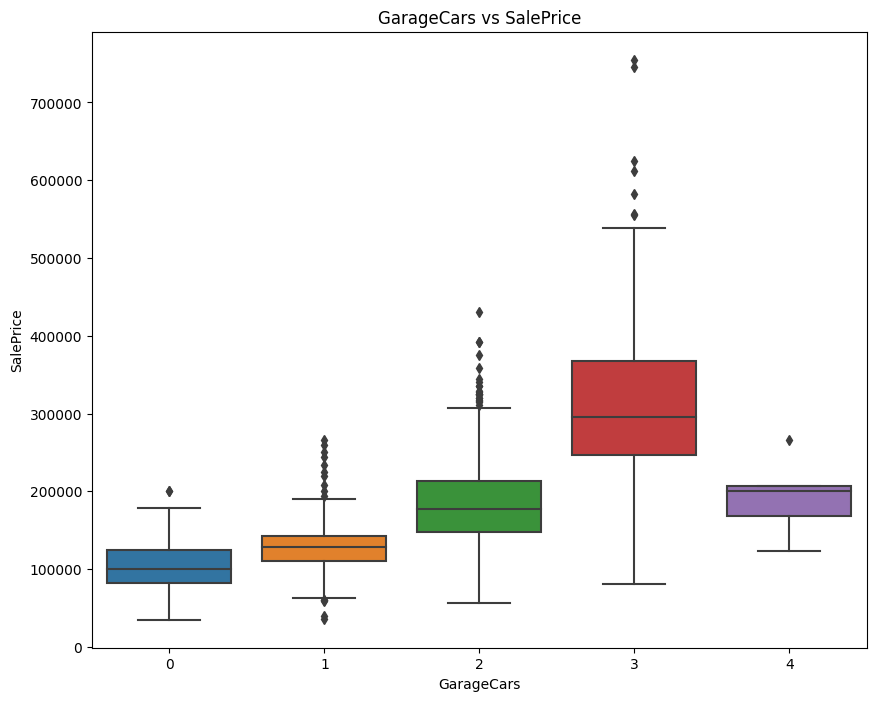

In [10]:
viz.box_plot(df_train_onehot, 'GarageCars', 'SalePrice')

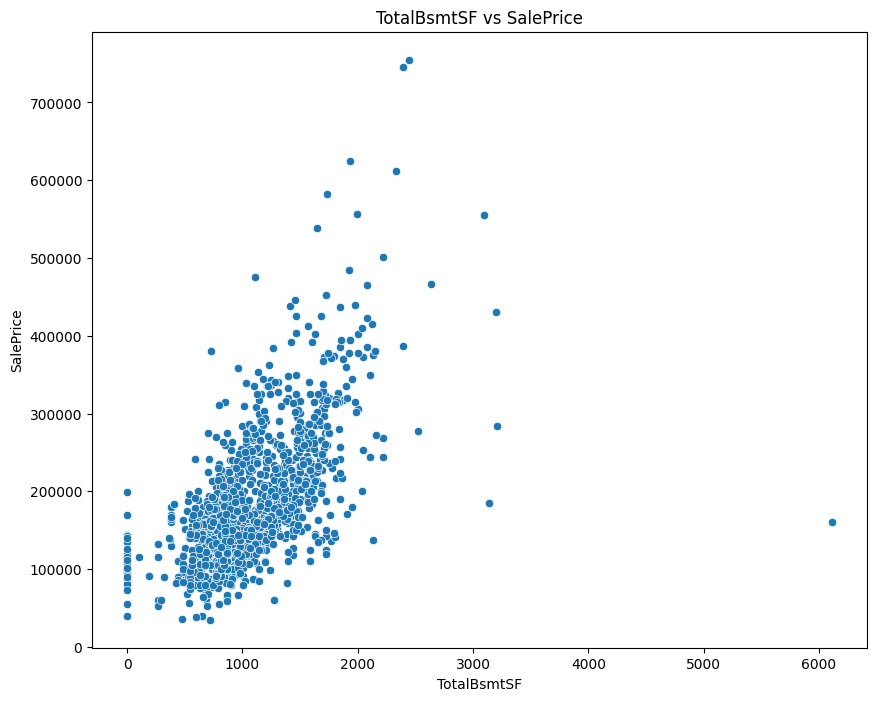

In [11]:
# 1 outlier is detected
viz.scatter_plot(df_train_onehot, 'TotalBsmtSF', 'SalePrice')
# append outliers to outliers list
outliers.append(df_train_onehot[(df_train_onehot.TotalBsmtSF > 5000) & (df_train_onehot.SalePrice < 200000)].Id.values)

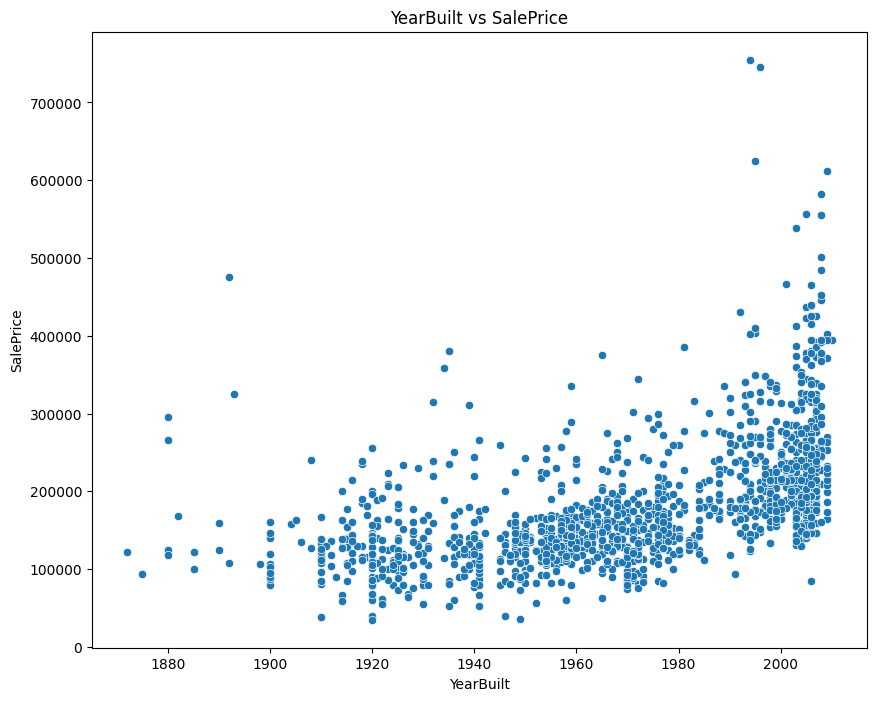

In [12]:
# New property tends to have a higher sale price
viz.scatter_plot(df_train_onehot, 'YearBuilt', 'SalePrice')

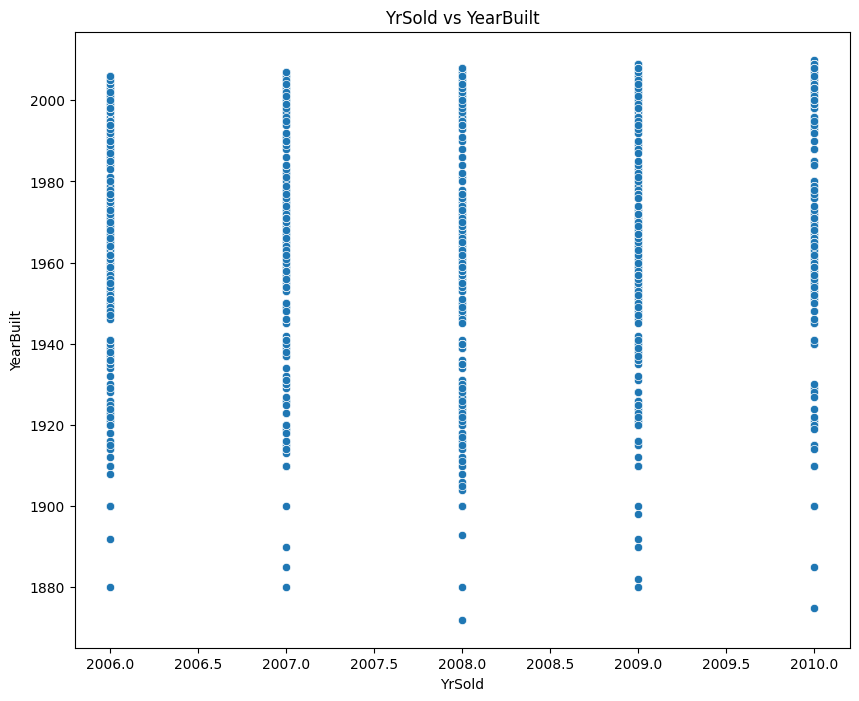

In [13]:
# YrSold and YearBuild is uniformly distributed
viz.scatter_plot(df_train_onehot, 'YrSold', 'YearBuilt')

# Data-Preprocessing

In [14]:
def get_importance(target):
    print(df_train.corr().SalePrice.abs().loc[target])


outliers = [id for arr in outliers for id in arr]
# Check null values
print(df_full.isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False))
na_cols = list(
    df_full.isnull().sum().loc[lambda x: (x > 0) & (x.index != 'SalePrice') & (x.index != 'MasVnrArea')].index)
print(na_cols)
'''
PoolQC          NA = No Pool
MiscFeature     NA = No Miscellaneous feature
Alley           NA = No alley access
Fence           NA = No Fence
FireplaceQu     NA = No Fireplace
LotFrontage     Can remove column
GarageType      Can remove column
GarageYrBlt     Can remove column
GarageFinish    Can remove column
GarageQual      Can remove column
GarageCond      Can remove column
BsmtExposure    Can remove column
BsmtFinType2    Can remove column
BsmtFinType1    Can remove column
BsmtCond        Can remove column
BsmtQual        Can remove column
MasVnrArea      replace with 0
MasVnrType      Can remove column
Electrical      drop NA
'''

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64
['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 

'\nPoolQC          NA = No Pool\nMiscFeature     NA = No Miscellaneous feature\nAlley           NA = No alley access\nFence           NA = No Fence\nFireplaceQu     NA = No Fireplace\nLotFrontage     Can remove column\nGarageType      Can remove column\nGarageYrBlt     Can remove column\nGarageFinish    Can remove column\nGarageQual      Can remove column\nGarageCond      Can remove column\nBsmtExposure    Can remove column\nBsmtFinType2    Can remove column\nBsmtFinType1    Can remove column\nBsmtCond        Can remove column\nBsmtQual        Can remove column\nMasVnrArea      replace with 0\nMasVnrType      Can remove column\nElectrical      drop NA\n'

In [15]:
# to_drop = ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt',
#            'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond',
#            'BsmtQual', 'MasVnrType', 'PoolArea']
# df_full.drop(columns=na_cols, inplace=True, errors='ignore')
# df_full['MasVnrArea'] = df_full['MasVnrArea'].fillna(0)
# df_full.SalePrice = np.log1p(df_full.SalePrice)
# df_full.drop(df_full[(df_full.GrLivArea > 4000) & (df_full.SalePrice < 200000)].index, inplace=True)
# df_full

In [16]:
to_drop = ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageType', 'GarageYrBlt',
           'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinSF2', 'BsmtFinType2', 'BsmtFinType1',
           'BsmtCond', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'BsmtQual', 'MasVnrType', 'PoolArea']
df_train.drop(columns=to_drop, inplace=True, errors='ignore')
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)
df_train = df_train.drop(df_train.loc[df_train.Electrical.isnull()].index)
df_train.drop(df_train[(df_train.GrLivArea > 4000) & (df_train.SalePrice < 200000)].index, inplace=True)

# We'll do the same process on test set
df_test.drop(columns=to_drop, inplace=True, errors='ignore')
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0)
df_test = df_test.drop(df_test.loc[df_test.Electrical.isnull()].index)

df_full.drop(columns=to_drop, inplace=True, errors='ignore')
df_full['MasVnrArea'] = df_full['MasVnrArea'].fillna(0)
df_full.SalePrice = np.log1p(df_full.SalePrice)

# After dropping the selected columns, we still have some missing values left. Note that the SalePrice is from the testing set so we'll need to drop it after splitting the data
print(df_full.isna().sum().sort_values(ascending=False).loc[lambda x: x > 0])
print(df_full[df_full.SalePrice.isna()].shape)

SalePrice      1459
MSZoning          4
Utilities         2
Functional        2
GarageArea        1
TotalBsmtSF       1
BsmtFinSF1        1
Exterior2nd       1
Exterior1st       1
KitchenQual       1
GarageCars        1
Electrical        1
SaleType          1
dtype: int64
(1459, 58)


In [17]:
# So far we have already cleaned the full dataset
# Let's get the train and test dataset first from the cleaned full dataset
df_full_final = pd.get_dummies(df_full)
df_train = df_full_final[df_full_final.SalePrice.notnull()]
df_test = df_full_final[df_full_final.SalePrice.isnull()].drop(columns='SalePrice')
df_gower = df_full[df_full.SalePrice.notnull()]

# df_train.drop(df_train.loc[df_train.Electrical.isnull()].index, inplace=True)
df_train.drop(df_train[(df_train.GrLivArea > 4000) & (df_train.SalePrice < 200000)].index, inplace=True)

print(df_train.shape, df_test.shape)

(1456, 217) (1459, 216)


/var/folders/zw/h69rqth52kx48cx92_nj5www0000gn/T/ipykernel_36291/1374900046.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(df_train[(df_train.GrLivArea > 4000) & (df_train.SalePrice < 200000)].index, inplace=True)


Text(0.5, 1.0, 'After log transformation')

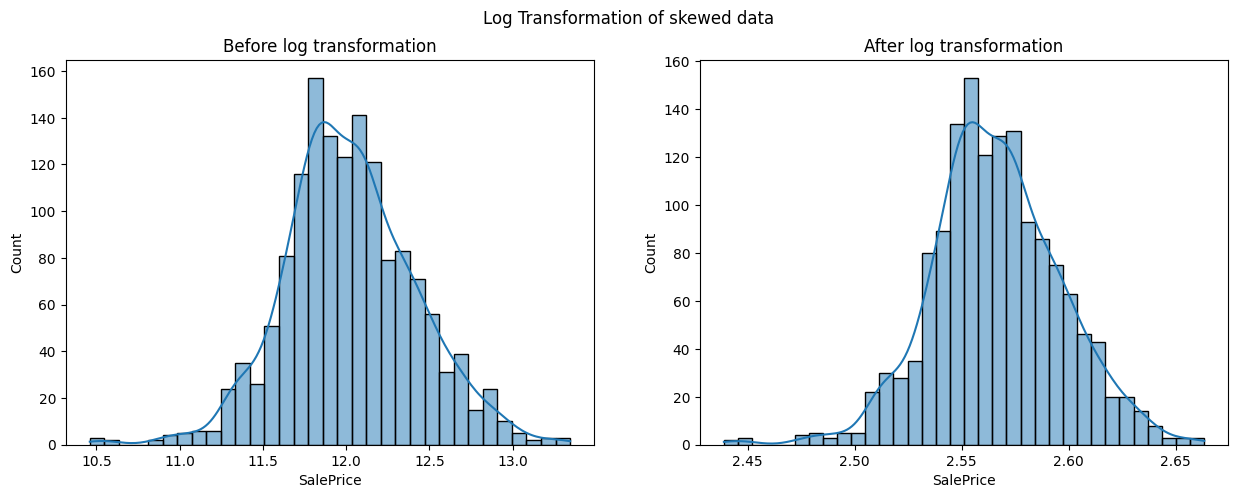

In [18]:
# As we found that the saleprice is right-skewed, we'll need to apply log transformation on skewed data
import seaborn as sns

df_train_log = df_train.copy()
df_train_log.SalePrice = np.log1p(df_train_log.SalePrice)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Log Transformation of skewed data')
sns.histplot(df_train, x='SalePrice', kde=True, ax=axes[0])
sns.histplot(df_train_log, x='SalePrice', kde=True, ax=axes[1])
axes[0].set_title("Before log transformation");
axes[1].set_title("After log transformation")

In [19]:
# We check further the skewness of other columns and apply the log transformation
from scipy.stats import skew

num_cols = df_full.dtypes[df_full.dtypes != 'object'].index
skewed_cols = df_full[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)
skewed_cols = skewed_cols[abs(skewed_cols) > 0.5]
for col in skewed_cols.index:
    # df_full[col] = np.log1p(df_full[col])
    df_test[col] = np.log1p(df_test[col])
    df_train[col] = np.log1p(df_train[col])
df_full

/var/folders/zw/h69rqth52kx48cx92_nj5www0000gn/T/ipykernel_36291/4244886813.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[col] = np.log1p(df_train[col])


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,61,0,0,0,0,2,2008,WD,Normal,12.247699
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,12.109016
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,42,0,0,0,0,9,2008,WD,Normal,12.317171
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,35,272,0,0,0,2,2006,WD,Abnorml,11.849405
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,84,0,0,0,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,24,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,32,0,0,0,700,7,2006,WD,Normal,NaN


In [20]:
val_model_comparison = {}
train_model_comparison = {}

In [21]:
# Next we can split the training dataset into train & validation set
X_train, X_val, Y_train, Y_val = train_test_split(df_train.drop(columns='SalePrice'), df_train.SalePrice, test_size=0.2,
                                                  random_state=myseed)
# We'll train the model using train set
linreg = LinearRegression().fit(X_train, Y_train)
# We can evaluate the model by using R^2 and RMSE
print(f"The R^2 of the model on training set is {linreg.score(X_train, Y_train)},"
      f"\nThe RMSE of the model on training set is {np.sqrt(mean_squared_error(Y_train, linreg.predict(X_train)))}.")
print(f"The R^2 of the model on validation set is {linreg.score(X_val, Y_val)},"
      f"\nThe RMSE of the model on validation set is {np.sqrt(mean_squared_error(Y_val, linreg.predict(X_val)))}.")
# Calculate the adjusted R^2
print(
    f"The adjusted R^2 of the model on training set is {1 - (1 - linreg.score(X_train, Y_train)) * (len(Y_train) - 1) / (len(Y_train) - X_train.shape[1] - 1)},"
    f"\nThe adjusted R^2 of the model on validation set is {1 - (1 - linreg.score(X_val, Y_val)) * (len(Y_val) - 1) / (len(Y_val) - X_val.shape[1] - 1)}.")
val_model_comparison['Linear Regression baseline'] = {'RMSE': np.sqrt(mean_squared_error(Y_val, linreg.predict(X_val))),
                                                      'R^2': linreg.score(X_val, Y_val),
                                                      'Adj R^2': 1 - (1 - linreg.score(X_val, Y_val)) * (
                                                              len(Y_val) - 1) / (
                                                                         len(Y_val) - X_val.shape[1] - 1)}
train_model_comparison['Linear Regression baseline'] = {
    'RMSE': np.sqrt(mean_squared_error(Y_train, linreg.predict(X_train))),
    'R^2': linreg.score(X_train, Y_train),
    'Adj R^2': 1 - (1 - linreg.score(X_train, Y_train)) * (len(Y_train) - 1) / (
            len(Y_train) - X_train.shape[1] - 1)}

The R^2 of the model on training set is 0.9450921706526794,
The RMSE of the model on training set is 0.09204494975235068.
The R^2 of the model on validation set is 0.921072902302685,
The RMSE of the model on validation set is 0.11403965362915425.
The adjusted R^2 of the model on training set is 0.9325683151732482,
The adjusted R^2 of the model on validation set is 0.6937628609344179.


In [22]:
# Given the fact that Adjusted R^2 in validation is higher, we need to regularize the model

from sklearn.linear_model import RidgeCV

print("Ridge Model")
model_ridge = RidgeCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75], alpha_per_target=True).fit(X_train, Y_train)
# Evaluate the ridge model
print(f"The R^2 of the model on training set is {model_ridge.score(X_train, Y_train)},"
      f"\nThe RMSE of the model on training set is {np.sqrt(mean_squared_error(Y_train, model_ridge.predict(X_train)))}.")
print(f"The R^2 of the model on validation set is {model_ridge.score(X_val, Y_val)},"
      f"\nThe RMSE of the model on validation set is {np.sqrt(mean_squared_error(Y_val, model_ridge.predict(X_val)))}.")
print(
    f"The adjusted R^2 of the model on training set is {1 - (1 - model_ridge.score(X_train, Y_train)) * (len(Y_train) - 1) / (len(Y_train) - X_train.shape[1] - 1)},"
    f"\nThe adjusted R^2 of the model on validation set is {1 - (1 - model_ridge.score(X_val, Y_val)) * (len(Y_val) - 1) / (len(Y_val) - X_val.shape[1] - 1)}.")
train_model_comparison['Ridge'] = {'RMSE': np.sqrt(mean_squared_error(Y_train, model_ridge.predict(X_train))),
                                   'R^2': model_ridge.score(X_train, Y_train),
                                   'Adj R^2': 1 - (1 - model_ridge.score(X_train, Y_train)) * (
                                           len(Y_train) - 1) / (
                                                      len(Y_train) - X_train.shape[1] - 1)}
val_model_comparison['Ridge'] = {'RMSE': np.sqrt(mean_squared_error(Y_val, model_ridge.predict(X_val))),
                                 'R^2': model_ridge.score(X_val, Y_val),
                                 'Adj R^2': 1 - (1 - model_ridge.score(X_val, Y_val)) * (
                                         len(Y_val) - 1) / (
                                                    len(Y_val) - X_val.shape[1] - 1)}

print("Lasso model")
# We can also try Lasso model
from sklearn.linear_model import LassoCV

model_lasso = LassoCV(alphas=[0.0001, 0.0003, 0.0005, 0.0007, 0.0009], max_iter=50000).fit(X_train, Y_train)
# Evaluate the lasso model
print(f"The R^2 of the model on training set is {model_lasso.score(X_train, Y_train)},"
      f"\nThe RMSE of the model on training set is {np.sqrt(mean_squared_error(Y_train, model_lasso.predict(X_train)))}.")
print(f"The R^2 of the model on validation set is {model_lasso.score(X_val, Y_val)},"
      f"\nThe RMSE of the model on validation set is {np.sqrt(mean_squared_error(Y_val, model_lasso.predict(X_val)))}.")
print(
    f"The adjusted R^2 of the model on training set is {1 - (1 - model_lasso.score(X_train, Y_train)) * (len(Y_train) - 1) / (len(Y_train) - X_train.shape[1] - 1)},"
    f"\nThe adjusted R^2 of the model on validation set is {1 - (1 - model_lasso.score(X_val, Y_val)) * (len(Y_val) - 1) / (len(Y_val) - X_val.shape[1] - 1)}.")
train_model_comparison['Lasso'] = {'RMSE': np.sqrt(mean_squared_error(Y_train, model_lasso.predict(X_train))),
                                   'R^2': model_lasso.score(X_train, Y_train),
                                   'Adj R^2': 1 - (1 - model_lasso.score(X_train, Y_train)) * (
                                           len(Y_train) - 1) / (
                                                      len(Y_train) - X_train.shape[1] - 1)}
val_model_comparison['Lasso'] = {'RMSE': np.sqrt(mean_squared_error(Y_val, model_lasso.predict(X_val))),
                                 'R^2': model_lasso.score(X_val, Y_val),
                                 'Adj R^2': 1 - (1 - model_lasso.score(X_val, Y_val)) * (
                                         len(Y_val) - 1) / (
                                                    len(Y_val) - X_val.shape[1] - 1)}

# Slightly better than the baseline linear regression model


Ridge Model
The R^2 of the model on training set is 0.9383247400051532,
The RMSE of the model on training set is 0.0975524816261133.
The R^2 of the model on validation set is 0.9228648137153227,
The RMSE of the model on validation set is 0.11273767894839083.
The adjusted R^2 of the model on training set is 0.9242573100591269,
The adjusted R^2 of the model on validation set is 0.700715477215452.
Lasso model
The R^2 of the model on training set is 0.9365516373298172,
The RMSE of the model on training set is 0.09894481413031156.
The R^2 of the model on validation set is 0.923195810402914,
The RMSE of the model on validation set is 0.11249553319167763.
The adjusted R^2 of the model on training set is 0.9220797826975474,
The adjusted R^2 of the model on validation set is 0.7019997443633063.


In [23]:
# Save a submission file to check RMSE score on Kaggle
pd.DataFrame({"Id": pd.read_csv(test_path).Id, "SalePrice": np.expm1(linreg.predict(df_test.fillna(0)))}).to_csv(
    "linear.csv",
    index=False)

# Decision Tree

The R^2 of the model on training set is 0.856747158069642,
The RMSE of the model on training set is 0.14867380300372807.
The R^2 of the model on validation set is 0.7271303007450307,
The RMSE of the model on validation set is 0.21204131019654252.


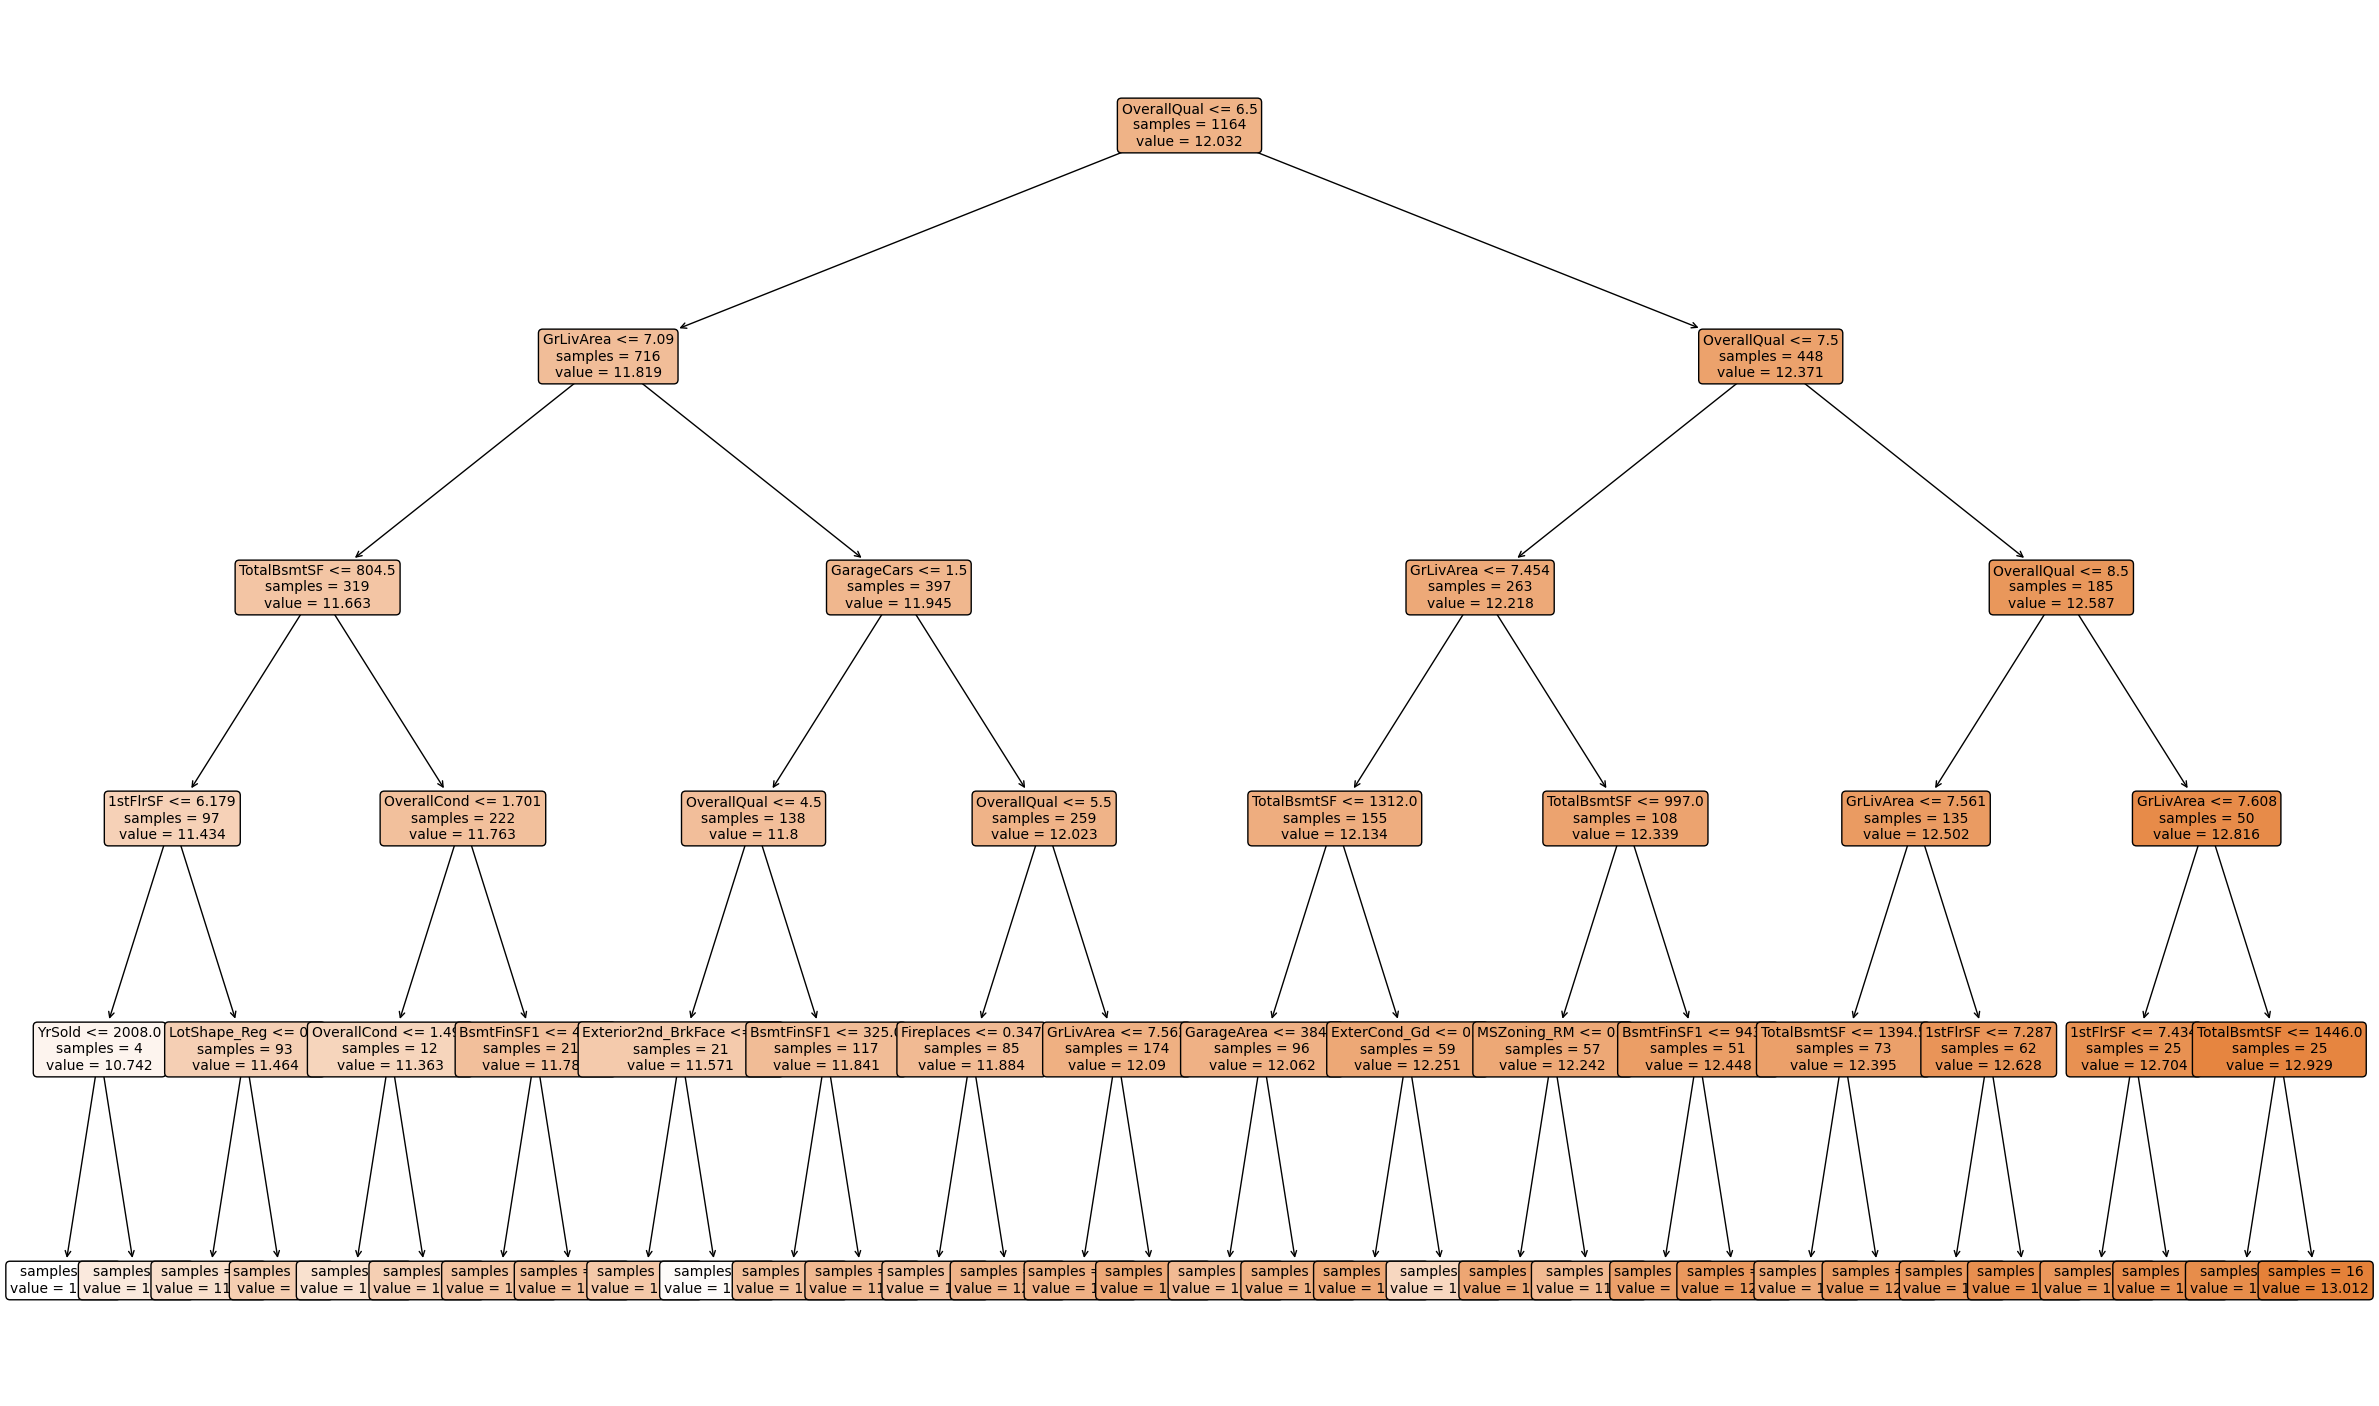

In [24]:
# We use the same dataset to train the decision tree model
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5, random_state=myseed).fit(X_train, Y_train)
print(f"The R^2 of the model on training set is {dtr.score(X_train, Y_train)},"
      f"\nThe RMSE of the model on training set is {np.sqrt(mean_squared_error(Y_train, dtr.predict(X_train)))}.")
print(f"The R^2 of the model on validation set is {dtr.score(X_val, Y_val)},"
      f"\nThe RMSE of the model on validation set is {np.sqrt(mean_squared_error(Y_val, dtr.predict(X_val)))}.")
plt.figure(figsize=(30, 18))
plot_tree(
    dtr,
    feature_names=X_train.columns,
    impurity=False,
    filled=True,
    fontsize=10,
    rounded=True
)
train_model_comparison['Decision Tree pruned'] = {'RMSE': np.sqrt(mean_squared_error(Y_train, dtr.predict(X_train))),
                                                  'R^2': dtr.score(X_train, Y_train),
                                                  'Adj R^2': 1 - (1 - dtr.score(X_train, Y_train)) * (
                                                          len(Y_train) - 1) / (
                                                                     len(Y_train) - X_train.shape[1] - 1)}
val_model_comparison['Decision Tree pruned'] = {'RMSE': np.sqrt(mean_squared_error(Y_val, dtr.predict(X_val))),
                                                'R^2': dtr.score(X_val, Y_val),
                                                'Adj R^2': 1 - (1 - dtr.score(X_val, Y_val)) * (
                                                        len(Y_val) - 1) / (
                                                                   len(Y_val) - X_val.shape[1] - 1)}
# However the baseline decision tree model looks underfitting as the RMSE is worse than the linear regression model
# pd.DataFrame({"Id": df_test.Id, "SalePrice": np.expm1(dtr.predict(X_test))}).to_csv("dtr.csv", index=False)

In [25]:
missing_percentage[missing_percentage > 10].drop('SalePrice').index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [26]:
# Since we've selected the features, and that might be the reason why the decision tree model is underfitting
# we can try to use all the features except outliers and more than 10% missing values to train the model
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)
df_full = pd.concat((df_train, df_test), axis=0)

df_full['MasVnrArea'] = df_full['MasVnrArea'].fillna(0)
df_full = df_full.drop(df_full.loc[df_full.Electrical.isnull()].index)
df_full.drop(missing_percentage[missing_percentage > 10].drop('SalePrice').index, axis=1, errors='ignore', inplace=True)
df_full.drop(labels=['Id', 'LotFrontage', 'GarageYrBlt'], axis=1, errors='ignore', inplace=True)
df_full.SalePrice = np.log1p(df_full.SalePrice)
df_full.drop(df_full[(df_full.GrLivArea > 4000) & (df_full.SalePrice < 200000)].index, inplace=True)
df_full_final = pd.get_dummies(df_full)
df_train = df_full_final[df_full_final.SalePrice.notnull()]
df_test = df_full_final[df_full_final.SalePrice.isnull()].drop(columns='SalePrice')
X_train, X_val, Y_train, Y_val = train_test_split(df_train.drop(columns='SalePrice'), df_train.SalePrice, test_size=0.2,
                                                  random_state=myseed)

The R^2 of the model on training set is 0.9214016185204151,
The RMSE of the model on training set is 0.1100243207284675.
The R^2 of the model on validation set is 0.7599948605499133,
The RMSE of the model on validation set is 0.20081768779672177.


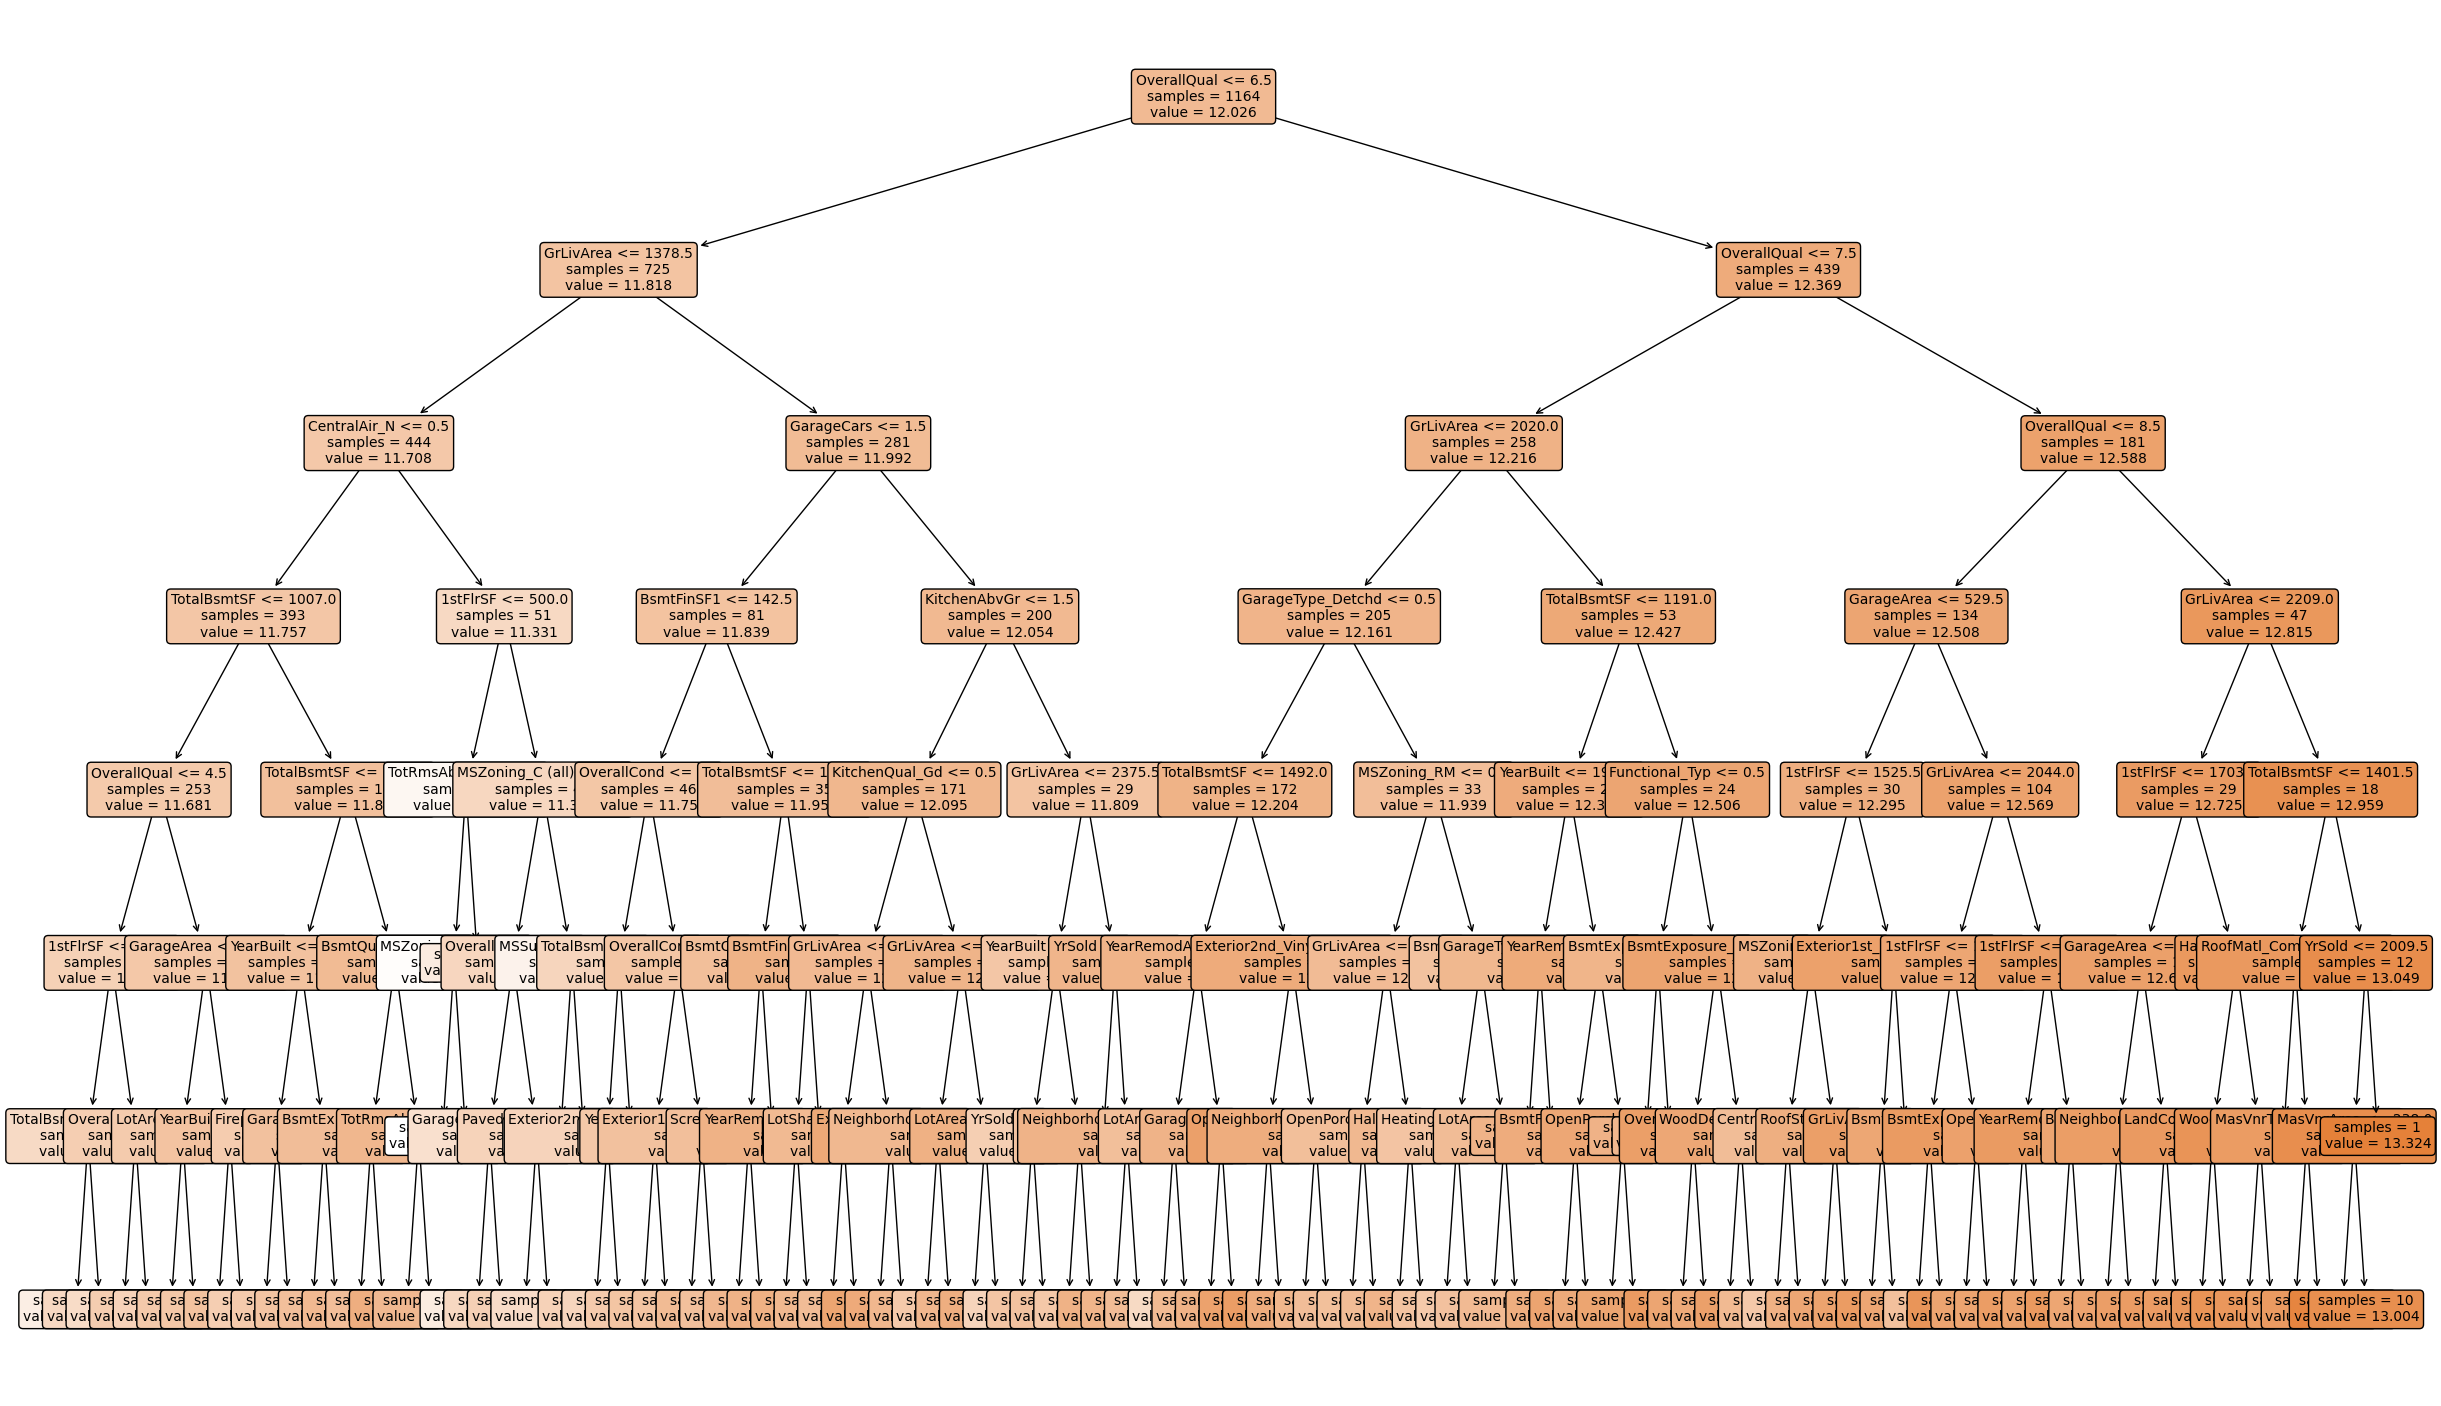

In [27]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=7, random_state=myseed).fit(X_train, Y_train)
print(f"The R^2 of the model on training set is {dtr.score(X_train, Y_train)},"
      f"\nThe RMSE of the model on training set is {np.sqrt(mean_squared_error(Y_train, dtr.predict(X_train)))}.")
print(f"The R^2 of the model on validation set is {dtr.score(X_val, Y_val)},"
      f"\nThe RMSE of the model on validation set is {np.sqrt(mean_squared_error(Y_val, dtr.predict(X_val)))}.")
plt.figure(figsize=(30, 18))
plot_tree(
    dtr,
    feature_names=X_train.columns,
    impurity=False,
    filled=True,
    fontsize=10,
    rounded=True
)
train_model_comparison['Decision Tree baseline'] = {'RMSE': np.sqrt(mean_squared_error(Y_train, dtr.predict(X_train))),
                                                    'R^2': dtr.score(X_train, Y_train),
                                                    'Adj R^2': 1 - (1 - dtr.score(X_train, Y_train)) * (
                                                            len(Y_train) - 1) / (
                                                                       len(Y_train) - X_train.shape[1] - 1)}
val_model_comparison['Decision Tree baseline'] = {'RMSE': np.sqrt(mean_squared_error(Y_val, dtr.predict(X_val))),
                                                  'R^2': dtr.score(X_val, Y_val),
                                                  'Adj R^2': 1 - (1 - dtr.score(X_val, Y_val)) * (
                                                          len(Y_val) - 1) / (
                                                                     len(Y_val) - X_val.shape[1] - 1)}

In [28]:
# Use GridSearchCV to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 6, 7, 10], 'max_features': [None, 'sqrt'],
              'max_leaf_nodes': [None, 15, 20], 'min_samples_split': [2, 5, 10, 15],
              'random_state': [myseed]}
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, verbose=1,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)
print(np.sqrt(mean_squared_error(Y_val, grid_search.predict(X_val))))
train_model_comparison['Decision Tree CV'] = {
    'RMSE': np.sqrt(mean_squared_error(Y_train, grid_search.predict(X_train))),
    'R^2': grid_search.best_estimator_.fit(X_train, Y_train).score(X_train, Y_train),
    'Adj R^2': 1 - (1 - grid_search.best_estimator_.fit(X_train, Y_train).score(X_train, Y_train)) * (
            len(Y_train) - 1) / (
                       len(Y_train) - X_train.shape[1] - 1)}
val_model_comparison['Decision Tree CV'] = {'RMSE': np.sqrt(mean_squared_error(Y_val, grid_search.predict(X_val))),
                                            'R^2': grid_search.best_estimator_.fit(X_train, Y_train).score(X_val,
                                                                                                           Y_val),
                                            'Adj R^2': 1 - (1 - grid_search.best_estimator_.fit(X_train, Y_train).score(
                                                X_val, Y_val)) * (
                                                               len(Y_val) - 1) / (
                                                               len(Y_val) - X_val.shape[1] - 1)}
# pd.DataFrame({"Id": df_test.Id, "SalePrice": np.expm1(grid_search.predict(X_test))}).to_csv("dtr_cv.csv", index=False)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_split': 15, 'random_state': 3836}
0.18587567820477927


In [29]:
1 - (1 - grid_search.best_estimator_.fit(X_train, Y_train).score(X_val, Y_val)) * (len(Y_val) - 1) / (
        len(Y_val) - X_val.shape[1] - 1)

-1.592578476840186

In [30]:
grid_search.best_estimator_.fit(X_train, Y_train).score(X_val, Y_val)

0.7943817070092266

In [31]:
# Use random forest to improve the model
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=myseed).fit(X_train, Y_train)
print(np.sqrt(mean_squared_error(Y_val, rfr.predict(X_val))))
train_model_comparison['Random Forest'] = {'RMSE': np.sqrt(mean_squared_error(Y_train, rfr.predict(X_train))),
                                           'R^2': rfr.score(X_train, Y_train),
                                           'Adj R^2': 1 - (1 - rfr.score(X_train, Y_train)) * (
                                                   len(Y_train) - 1) / (
                                                              len(Y_train) - X_train.shape[1] - 1)}
val_model_comparison['Random Forest'] = {'RMSE': np.sqrt(mean_squared_error(Y_val, rfr.predict(X_val))),
                                         'R^2': rfr.score(X_val, Y_val),
                                         'Adj R^2': 1 - (1 - rfr.score(X_val, Y_val)) * (
                                                 len(Y_val) - 1) / (
                                                            len(Y_val) - X_val.shape[1] - 1)}
# pd.DataFrame({"Id": df_test.Id, "SalePrice": np.expm1(rfr.predict(X_test))}).to_csv("rfr.csv", index=False)

0.14653052591835003


In [32]:
print("=" * 60)
print(f"Model Comparison on Training set\n{pd.DataFrame(train_model_comparison).T.sort_values(by='RMSE')}")
print("=" * 60)
print(f"Model Comparison on Validation set\n{pd.DataFrame(val_model_comparison).T.sort_values(by='RMSE')}")

Model Comparison on Training set
                                RMSE       R^2   Adj R^2
Random Forest               0.060508  0.976228  0.969144
Linear Regression baseline  0.092045  0.945092  0.932568
Decision Tree CV            0.094781  0.941672  0.924291
Ridge                       0.097552  0.938325  0.924257
Lasso                       0.098945  0.936552  0.922080
Decision Tree baseline      0.110024  0.921402  0.897980
Decision Tree pruned        0.148674  0.856747  0.824073
Model Comparison on Validation set
                                RMSE       R^2   Adj R^2
Lasso                       0.112496  0.923196  0.702000
Ridge                       0.112738  0.922865  0.700715
Linear Regression baseline  0.114040  0.921073  0.693763
Random Forest               0.146531  0.872217 -0.611176
Decision Tree CV            0.185876  0.794382 -1.592578
Decision Tree baseline      0.200818  0.759995 -2.026152
Decision Tree pruned        0.212041  0.727130 -0.058734


# Let's try to reduce the dimension of dataset

# PCA & KMeans

In [33]:
df_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0.0,0.0,0.0,953.0,...,0,0,0,1,0,0,0,0,1,0
1456,20,13175,6,6,1978,1988,119.0,790.0,163.0,589.0,...,0,0,0,1,0,0,0,0,1,0
1457,70,9042,7,9,1941,2006,0.0,275.0,0.0,877.0,...,0,0,0,1,0,0,0,0,1,0
1458,20,9717,5,6,1950,1996,0.0,49.0,1029.0,0.0,...,0,0,0,1,0,0,0,0,1,0


/Users/apple/.pyenv/versions/3.9.13/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.9999998436137093


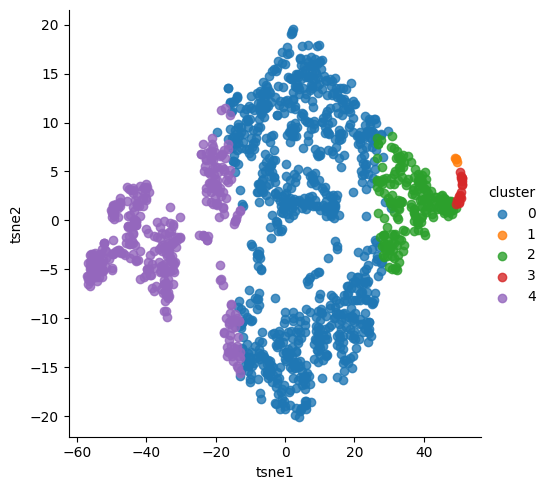

In [34]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

model = TSNE(n_components=2, perplexity=50, random_state=myseed)
tsne = model.fit_transform(df_train.drop("SalePrice", axis=1))

# We reduce the dimension to 20 using PCA, followed by a KMeans Clustering to get 5 clusters, and visualize the data in a 2d plane using TSNE
pca = PCA(n_components=20).fit(df_train.drop("SalePrice", axis=1))
pc = pca.transform(df_train.drop("SalePrice", axis=1))
kmeans = KMeans(n_clusters=5).fit(pc)
# Use fit_transform() to get the reduced dimension dataset

# Visualize the results
rr = pd.DataFrame({'tsne1': tsne[:, 0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=rr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print(np.sum(pca.explained_variance_ratio_))

In [35]:
linreg2 = LinearRegression().fit(pc, df_train.SalePrice)
print(f"RMSE of train data is {np.sqrt(mean_squared_error(Y_train, linreg2.predict(pca.transform(X_train))))}")
print(f"RMSE of val data is {np.sqrt(mean_squared_error(Y_val, linreg2.predict(pca.transform(X_val))))}")

RMSE of train data is 0.15606598497895133
RMSE of val data is 0.15275569506681957


In [ ]:


# Testing code
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import gower 

# generate action df
# trasform action df into rating df


# randomly generate the house data and the interaction data
# Define the number of samples
n_samples = 500

# Define the categorical features and their possible values
cat_features = ['waterfront', 'view', 'condition', 'grade']
cat_values = [[0, 1], [0, 1, 2, 3], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]]

# Generate categorical features randomly
cat_data = []
for i in range(len(cat_features)):
    feature_values = np.random.choice(cat_values[i], size=n_samples)
    cat_data.append(feature_values)

# Define the numerical features and their distributions
num_features = ['bedrooms', 'bathrooms', 'sqft_living', 'price']
num_distributions = [np.random.randint(1, 10, size=n_samples),
                     np.random.choice([1, 1.5, 2, 2.5, 3], size=n_samples),
                     np.random.normal(loc=2000, scale=500, size=n_samples),
                     np.random.normal(loc=500000, scale=100000, size=n_samples)]

# Combine categorical and numerical features into a DataFrame
data = pd.DataFrame(np.column_stack(cat_data + num_distributions),
                    columns=cat_features + num_features)



num_houses = 500
num_users = 10000
'''
# house_ids = np.random.randint(1, num_houses+1, size=500)
bedrooms = np.random.randint(1, 6, size=num_houses)
bathrooms = np.random.randint(1, 4, size=num_houses)
sqft_living = np.random.randint(300, 3001, size=num_houses)
price = np.random.randint(100000, 500001, size=num_houses)
house_df = pd.DataFrame({'house_id': np.arange(1, num_houses+1), 'bedrooms': bedrooms, 'bathrooms': bathrooms, 'sqft_living': sqft_living, 'price': price}, )
'''

# Combine categorical and numerical features into a DataFrame
house_df = pd.DataFrame(np.column_stack(cat_data + num_distributions),
                    columns=cat_features + num_features)

# Add house_id column to DataFrame
house_df['house_id'] = np.arange(1, num_houses+1)

# Set house_id as index of DataFrame
house_df = house_df.set_index('house_id')
interaction_matrix = np.random.randint(0, 4, size = (num_users, num_houses))
interaction_df = pd.DataFrame(interaction_matrix, columns=house_df['house_id'])
#normalize the interaction matrix
normalized_interaction_matrix = normalize(interaction_df, axis=1)

# Collaborative Filtering (generate recommedation)
# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(normalized_interaction_matrix.T)
# Get the top k most similar houses
house_id = 1
k = 10
# selecting all houses in the house_df DataFrame except for the target house
similar_houses = list(house_df.loc[house_df['house_id'] != house_id, 'house_id'])
similar_houses_scores = {}
for h in similar_houses:
    score = np.sum(similarity_matrix[house_id-1, house_df.loc[house_df['house_id'] == h, 'house_id']-1] * normalized_interaction_matrix[:, h-1])
    similar_houses_scores[h] = score
top_k_indices = sorted(similar_houses_scores, key=similar_houses_scores.get, reverse=True)[:k]
recommended_houses = house_df.loc[house_df['house_id'].isin(top_k_indices)].copy()
recommended_houses.loc[:, 'similarity_score'] = [similar_houses_scores[h] for h in recommended_houses['house_id']]
recommended_houses_by_cf = recommended_houses.sort_values(by=['similarity_score'], ascending=False)

# Print the recommended houses
# print(recommended_houses_by_cf)


# KNN (generate recommedation)
# Select the feature columns for KNN
feature_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'price','waterfront', 'view', 'condition', 'grade']
feature_matrix = house_df[feature_columns]

# Define categorical and numerical features
cat_cols = ['waterfront', 'view', 'condition', 'grade']
num_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'price']

# Standardize numerical columns
scaler = StandardScaler()
house_df[num_cols] = scaler.fit_transform(house_df[num_cols])

# Calculate Gower distance matrix
dist_matrix = gower.gower_matrix(house_df[cat_cols + num_cols].values)

# Fit k-NN model
k = 5
nn_model = NearestNeighbors(n_neighbors=k, algorithm='brute', metric='precomputed')
nn_model.fit(dist_matrix)

# Define new house for recommendation
new_house = pd.DataFrame({
    'waterfront': 0,
    'view': 0,
    'condition': 3,
    'grade': 7,
    'bedrooms': 3,
    'bathrooms': 2,
    'sqft_living': 2000,
    'price': 500000
}, index=[0])

# Standardize numerical columns of new house
new_house[num_cols] = scaler.transform(new_house[num_cols])

# Calculate Gower distance between new house and existing houses
new_dist_matrix = gower.gower_matrix(pd.concat([house_df, new_house])[cat_cols + num_cols].values)[-1, :-1]

# Find k-NN for new house
knn_indices = nn_model.kneighbors([new_dist_matrix])[1][0]

# Get k-NN houses
knn_houses = house_df.iloc[knn_indices]

# Return the top k recommended houses
recommended_houses = knn_houses.sort_values('price').head(k)

print(recommended_houses)

'''
# Scale the feature matrix
scaler = StandardScaler()
feature_matrix_scaled = scaler.fit_transform(feature_matrix)
# Instantiate a NearestNeighbors object
knn = NearestNeighbors(metric='gower', algorithm='brute')
# Fit the NearestNeighbors object to the feature matrix
knn.fit(feature_matrix_scaled)
# Generate the recommended houses for a target house:
house_id=123
num_neighbors=10
# Get the index of the target house
house_idx = house_df[house_df['house_id'] == house_id].index[0]
# Get the distances and indices of the k closest neighbors 
distances, indices = knn.kneighbors(feature_matrix_scaled[house_idx, :].reshape(1, -1), n_neighbors=num_neighbors+1)
# Get the indices of the k closest neighbors (excluding the target house itself)
neighbor_indices = indices.flatten()[1:]
# Return the top k recommended houses
recommended_houses_by_knn = house_df.iloc[neighbor_indices]

# Combine 2 methods
recommended_houses = pd.concat([recommended_houses_by_cf, recommended_houses_by_knn]).drop_duplicates().reset_index(drop=True)

print(recommended_houses)
'''


In [42]:
import pandas as pd

# Generate sample data
data = {
    'user_id': [1, 1, 2, 3, 3, 3, 4],
    'house_id': [101, 102, 103, 104, 105, 106, 107],
    'like': [True, False, False, True, False, True, False],
    'save': [True, False, True, False, True, False, True],
    'contact': [False, True, True, False, True, False, True],
    'tour': [True, False, False, True, False, True, False]
}

df = pd.DataFrame(data)
print(df)

# Convert actions to ratings
actions = ['like', 'save', 'contact', 'tour']
ratings = {action: 1 for action in actions}

# Group actions by user and house, and calculate ratings
grouped = df.groupby(['user_id', 'house_id']).sum()
grouped.reset_index(inplace=True)
grouped['rating'] = 0

for action in actions:
    grouped['rating'] += grouped[action] * ratings[action]

# Merge rating data with original data
merged = pd.merge(df, grouped[['user_id', 'house_id', 'rating']], on=['user_id', 'house_id'])

print(merged)




   user_id  house_id   like   save  contact   tour
0        1       101   True   True    False   True
1        1       102  False  False     True  False
2        2       103  False   True     True  False
3        3       104   True  False    False   True
4        3       105  False   True     True  False
5        3       106   True  False    False   True
6        4       107  False   True     True  False
   user_id  house_id   like   save  contact   tour  rating
0        1       101   True   True    False   True       3
1        1       102  False  False     True  False       1
2        2       103  False   True     True  False       2
3        3       104   True  False    False   True       2
4        3       105  False   True     True  False       2
5        3       106   True  False    False   True       2
6        4       107  False   True     True  False       2
